This Notebook will be modified as long as I am progressing in Titanic prediction modeling Using Machine Learning Models.
**My working methodology is as following:**
1.  Loading necessary Libraries
2. Data Vizualisation 
3. Analyzing data quality
4. Exploratory analysis: cleaning and engineering features
4. Build Data prediction models using machine learning algorithms
5. Describe Results


# 1- Loading Libraries

In [ ]:
# Loading Numpy and Pandas Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns




# 2.  Data Vizualisation
## 2.1 Loading Data

In [ ]:
import pandas as pd
## Creating panda dataframes from train and test CSV files
print("Loading Training and Testing Data =====>")
training_data = pd.read_csv('../input/train.csv')
testing_data = pd.read_csv('../input/test.csv')
gender_submission_data = pd.read_csv('../input/gender_submission.csv')
print("<===== Training and Testing Data Loading finished")

In [ ]:
gender_submission_data.describe()

In [ ]:
""" the testing data lacks of the column Survived which is present in the gender_submission file as the output
of the learning process later for the test part. Since we need to verify how good is our data before moving to
the learning process, i decided to build a new testing data that has the same shape as the training data
"""
testing_data = pd.merge(testing_data, gender_submission_data, on='PassengerId')

In [ ]:
testing_data.head(5)

In [ ]:
"""we need to reorder the data so that we have the same columns as in the training data"""
testing_data = testing_data[training_data.columns.tolist()]

In [ ]:
testing_data.head(5)

##### Tip
Here , we will first display the content in each dataframe. Using to_string() method is not a very good idea to see the data
Then we will analyse the Data by creating graphs 

## 2.2 Dataframes manipulations with Pandas
https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

In [ ]:
'''
    Printing the 5 first samples in training_data dataframe 
'''
training_data.head(5)

In [ ]:
'''
    Printing the 6 samples select randomly in training_data dataframe 
'''
training_data.sample(6)

In [ ]:
training_data.describe()

In [ ]:
training_data.columns

In [ ]:
training_data.dtypes

In [ ]:

%matplotlib inline
'''
    Creating dataframes separating survived and not survived passergers
'''
td_not_survived=training_data.loc[(training_data['Survived']==0)]
td_survived=training_data.loc[(training_data['Survived']==1)]

In [ ]:
td_not_survived.head(5)

In [ ]:
td_survived.sample(10)

## 2.3 Plots

### 2.3.1 A very first look into the data

In [ ]:
f,ax = plt.subplots(3,4,figsize=(20,16))
sns.countplot('Pclass',data=training_data,ax=ax[0,0])
sns.countplot('Sex',data=training_data,ax=ax[0,1])
sns.boxplot(x='Pclass',y='Age',data=training_data,ax=ax[0,2])
sns.countplot('SibSp',hue='Survived',data=training_data,ax=ax[0,3],palette='husl')
sns.distplot(training_data['Fare'].dropna(),ax=ax[2,0],kde=False,color='b')
sns.countplot('Embarked',data=training_data,ax=ax[2,2])

sns.countplot('Pclass',hue='Survived',data=training_data,ax=ax[1,0],palette='husl')
sns.countplot('Sex',hue='Survived',data=training_data,ax=ax[1,1],palette='husl')
sns.distplot(training_data[training_data['Survived']==0]['Age'].dropna(),ax=ax[1,2],kde=False,color='r',bins=5)
sns.distplot(training_data[training_data['Survived']==1]['Age'].dropna(),ax=ax[1,2],kde=False,color='g',bins=5)
sns.countplot('Parch',hue='Survived',data=training_data,ax=ax[1,3],palette='husl')
sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=training_data,palette='husl',ax=ax[2,1])
sns.countplot('Embarked',hue='Survived',data=training_data,ax=ax[2,3],palette='husl')

ax[0,0].set_title('Total Passengers by Class')
ax[0,1].set_title('Total Passengers by Gender')
ax[0,2].set_title('Age Box Plot By Class')
ax[0,3].set_title('Survival Rate by SibSp')
ax[1,0].set_title('Survival Rate by Class')
ax[1,1].set_title('Survival Rate by Gender')
ax[1,2].set_title('Survival Rate by Age')
ax[1,3].set_title('Survival Rate by Parch')
ax[2,0].set_title('Fare Distribution')
ax[2,1].set_title('Survival Rate by Fare and Pclass')
ax[2,2].set_title('Total Passengers by Embarked')
ax[2,3].set_title('Survival Rate by Embarked')

### 2.3.2 Plotting histogram of survived by Gender
The number of survived persons may depend on the Sex of the person. So it will be more accurate to see a plot describing whether there is so much difference if the gender is different

In [ ]:

df = training_data.groupby(['Sex','Survived']).size() # output pandas.core.series.Series
type(df) # pandas.core.series.Series
#df=df.unstack()
df.head()


In [ ]:
plt.figure();df.plot(kind='bar').set_title('Gender histogram training data')

As shown in this plot. Approximately 3/4 of females we survived and Only 1/6 males were survived
Here are the results
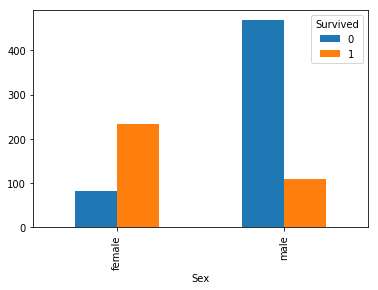


In [ ]:
df = td_survived.groupby('Sex').size()
#df=df.unstack()
df.head()

In [ ]:
plt.figure();df.plot(kind='bar').set_title('Survived passengers by gender');

In [ ]:
df = td_not_survived.groupby('Sex').size()
plt.figure();df.plot(kind='bar').set_title(' Not Survived passengers by gender');

The Gender feature could be helpful for our model prediction since the possible values are just male or female and there could be a stretch relation between Gender  and the passenger chances to survive. We'll keep this one and we'll transform it into a numeric type, so it's easier for the model to interpret it.

### 2.3.3 Plotting histogram of survived by Pclass

In [ ]:
df = td_survived.groupby('Pclass').size()
plt.figure();df.plot(kind='bar').set_title('Survived passengers by Pclass');

In [ ]:
df = td_not_survived.groupby('Pclass').size()
plt.figure();df.plot(kind='bar').set_title('Not Survived passengers by Pclass');

Most of not survived Passengers in Titanic were from 3rd Class. We need to check whether 1st and 2nd Class who didn't survive are from which category of age and which gender

### 2.3.4 Plotting histogram of survived by Age

In [ ]:
plt.figure();
td_survived.Age.hist()

In [ ]:
'''
Let us see how the age is distributed over ALL the passengers whether survived or not
'''
plt.figure();
plt.suptitle("Passengers Age distribution",x=0.5, y=1.05, ha='center', fontsize='xx-large');
pl1 = training_data.Age.hist();
pl1.set_xlabel("Age")
pl1.set_ylabel("Count")



As a first sight, I suppose that most old people and children were rescued. So, Let us see in depth the percentage of each interval have been rescued.
I will separate the passengers into 4 groups depending on Age:
1. **CHILDREN** between 0 and 15
2. **YOUNG ADULTS** between 16 and 30
3. **ADULTS** between 31 and 60
4. **OLD** between 61 and 80

In [ ]:
'''
 separate the passengers into 4 groups depending on Age:
'''
df_children = training_data.loc[(training_data['Age']>=0)].loc[(training_data['Age']<=15)]
df_y_adults = training_data.loc[(training_data['Age'] >15)].loc[(training_data['Age']<=30 )]
df_adults = training_data.loc[(training_data['Age'] >30)].loc[(training_data['Age']<=60 )]
df_old = training_data.loc[(training_data['Age'] >60)]

In [ ]:
plt.figure(1)

df1 = df_children.groupby('Survived').size() # with .size() we generate a pandas pandas.core.series.Series Series type variable
plt.subplot(2,2,1)
df1.plot(kind='bar').set_title('Children') 
df2 = df_y_adults.groupby('Survived').size() # with .size() we generate a pandas  pandas.core.series.Series Series type variable
plt.subplot(2,2,2)
df2.plot(kind='bar').set_title('young Adults')
df3 = df_adults.groupby('Survived').size() # with .size() we generate a pandas pandas.core.series.Series Series type variable
plt.subplot(2,2,3)
df3.plot(kind='bar').set_title('Adults')
df4 = df_old.groupby('Survived').size() # with .size() we generate a pandas pandas.core.series.Series Series type variable
plt.subplot(2,2,4)
df4.plot(kind='bar').set_title('old')

In [ ]:
f,ax = plt.subplots(2,2,figsize=(10,10))
sns.countplot('Survived',data=df_children,ax=ax[0,0])
sns.countplot('Survived',data=df_y_adults,ax=ax[0,1])
sns.countplot('Survived',data=df_adults,ax=ax[1,0])
sns.countplot('Survived',data=df_old,ax=ax[1,1])

ax[0,0].set_title('Survival Rate by children')
ax[0,1].set_title('Survival Rate by young adults')
ax[1,0].set_title('Survival Rate by adults')
ax[1,1].set_title('Survival Rate by old')


# 3. Analyzing data quality

We need to analyse the data quality.
    Verify which columns having missing values. Missing values means null values (in pandas we have NaN values)
    The data as analyzed before contains this following columns with their corresponding type:
    
         * PassengerId      int64
        * Survived         int64
        * Pclass           int64
        * Name            object
        * Sex             object
        * Age            float64
        * SibSp            int64
        * Parch            int64
        * Ticket          object
        * Fare           float64
        * Cabin           object
        * Embarked        object
  We have missing values for CABIN, AGE and EMBARKED columns in both training and testing data. (we tested on the full da)

In [ ]:
df_full = pd.concat([training_data,testing_data]) # axis : {0/’index’, 1/’columns’}, default 0 The axis to concatenate along (by index)
num_all = len(df_full.index)
''' number of records of training data'''
num_train = len(training_data.index)
''' number of records of testing data'''
num_test = len(testing_data.index)
d = {'full' : num_all, 'train' : num_train, 'test' : num_test}
number_records = pd.Series(d)

In [ ]:
number_records.head()

In [ ]:
df_sum_null = df_full.isnull().sum().sort_values(ascending=False) # output pandas.core.series.Series
#df=df_sum_null.unstack() ==> does not work
plt.figure();df_sum_null.plot(kind='barh') # showing a horizontal bar plot 

In [ ]:
def percentage_missing(colname,df):
    length_df = len(df.index)
    per_missing = df_full[colname].isnull().sum() * 100/length_df
    return per_missing

In [ ]:
type(df_full.columns)
id_col = df_full.columns.tolist()

In [ ]:
type(d)

In [ ]:
dict_missing = {}
for colname in id_col :
    d = {colname:percentage_missing(colname,df_full)}
    dict_missing.update(d)
missing_values_percent = pd.Series(dict_missing).sort_values(ascending=False) 
plt.figure(figsize=(10,5));
plt1 = missing_values_percent.plot(kind='bar')
plt.suptitle("% missing by column",x=0.5, y=1.05, ha='center', fontsize='xx-large');
plt1.set_ylabel("% missing")

In [ ]:
print(dict_missing)

After  analyzing the missing data in the training and testing sets, we noticed that most of the values in the cabin column is null with 77% of null values in the column, 32% of Survived values are null and 20% of Age are null.  We need to fix the null value problems in the chapter Exploratory analysis: cleaning and engineering features.


# 4-Exploratory analysis: cleaning and engineering features

In this section we will first:
1- Cleaning Data: Clean the training and testing Data to get red of the null values
2- Data Processing: Build new data from the previous where strings are replaced by numerical values so that we can use it later
3- Features engineering: If it is possible generate features from the cleaned and processed Data

## 4.1 Data Cleaning

 According to many sources I read. Data cleaning is an essential part of data processing pipeline for machine learning.
 Most of professional data scientists spend a very large time in this part of the pipeline. 
 There are a common saying: **Better data beats fancier algorithms.**
*  The first step in data cleaning is removing unwanted observations from the dataset, which means that we should remove duplicated and irrelevant observations.
*  The next bucket under data cleaning involves fixing structural errors.
*  Filter Unwanted Outliers. In fact, Outliers can cause problems with certain types of models. For example, linear regression models are less robust to outliers than decision tree models.
*  Handle Missing Data: Missing data is a  tricky issue in applied machine learning.First, just to be clear, you cannot simply ignore missing values in your dataset. You must handle them in some way for the very practical reason that most algorithms do not accept missing values.


As mentioned before in the previous section, we need to correct the completeness of the data for the fields: Cabin, Age,Fare and Embarked where we found null values in some records.

In [ ]:
def data_clean_completeness(data):
    data.Age.fillna(value=data.Age.mean(), inplace=True)
    data.Fare.fillna(value=data.Fare.mean(), inplace=True)
    data.Cabin.fillna(value=(data.Cabin.value_counts().idxmax()), inplace=True)
    data.Embarked.fillna(value=(data.Embarked.value_counts().idxmax()), inplace=True)
    return data

In [ ]:
training_data = data_clean_completeness(training_data)
testing_data = data_clean_completeness(testing_data)